# Real-world Data Science: Applications of Visualization
## Qinyu Chen

In [2]:
# setting

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='crowwwww56', api_key='YNELI27nGE9bz8ZSFaxZ')
import plotly.plotly as py
import plotly.graph_objs as go

import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier

## 1 Exploratory Data Analysis

In [3]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [220]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [222]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


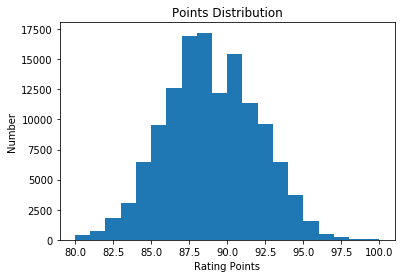

In [223]:
# Visualization 1: Points Distribution

plt.hist(data["points"], bins=20)
plt.title("Points Distribution")
plt.xlabel("Rating Points")
plt.ylabel("Number")
plt.show()

In the first visualization,...

In [224]:
# 改

# Visualization 2: Choropleth Map

country_counts = data['country'].value_counts()

py.iplot([go.Choropleth(
    locationmode = 'country names',
    locations = country_counts.index.values,
    text = country_counts.index,
    z = country_counts.values
)])

In the second visualization,...

## 2 Data Preprocessing

In [4]:
# drop columns, duplicates, na

# 'Unnamed: 0' is not related 
# 'designation', 'region_2,taster_twitter_handle' containing too many nan
# use 'description' instead of 'title'
data = data.drop(columns = ['Unnamed: 0','region_2','designation','taster_twitter_handle','title'])

data = data.drop_duplicates()
data = data.dropna()

data = data.reset_index(drop=True)

In [5]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery
0,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
1,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian
2,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
3,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem
4,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Frappato,Terre di Giurfo


In [6]:
# choosing random subset of the dataset

data = data.sample(n=5000)
data = data.reset_index(drop=True)

In [7]:
data.shape

(5000, 9)

In [8]:
data.head()

,country,description,points,price,province,region_1,taster_name,variety,winery
0,US,This is a moderately aromatic wine with notes ...,84,16.0,Oregon,Umpqua Valley,Sean P. Sullivan,Riesling,Girardet
1,France,"Fragrant and floral, this is a deliciously eas...",85,8.0,Southwest France,Vin de Pays des Côtes de Gascogne,Roger Voss,White Blend,Producteurs Plaimont
2,France,Aromas of peach and freshly cut apple peel tur...,90,26.0,Alsace,Alsace,Anne Krebiehl MW,Riesling,Kuentz-Bas
3,France,With the vineyards in the family since the 18t...,90,30.0,Bordeaux,Castillon Côtes de Bordeaux,Roger Voss,Bordeaux-style Red Blend,Château Bréhat
4,France,"A fresh, friendly and fruity apple scent on th...",87,20.0,Alsace,Alsace,Anne Krebiehl MW,Sylvaner,Domaine Charles Frey


In [9]:
data.dtypes

country         object
description     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
variety         object
winery          object
dtype: object

In [10]:
# one-hot encoding for categorical columns 

data = pd.get_dummies(data, columns = ["country","province","region_1","taster_name","variety","winery"])
data.shape

(5000, 4101)

In [11]:
# clean text data by removing stop words, tokenization, stemming

stopwords = []
with open('stopwords_english.txt') as fsw:
    for word in fsw.readlines():
        word = word.strip('\n')
        stopwords.append(word)
fsw.close()

def preprocess_text(text):
    text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    text = text.apply(lambda x: " ".join(x.strip() for x in str(x).split()))
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace('\d+', '')
    text = text.apply(lambda x: " ".join([word for word in str(x).split() if word not in (stopwords)]))
    text = text.astype(str)
    return text
data['description'] = preprocess_text(data['description'])

ps = nltk.stem.PorterStemmer()
def stem(text):
    text = text.apply(lambda x: " ".join([ps.stem(x) for x in str(x).split()]))
    return text
data['description'] = stem(data['description'])

In [12]:
data['description'].head()

0    moder aromat wine note tangerin lime herb dri ...
1    fragrant floral delici easi wine blend local g...
2    aroma peach freshli cut appl peel turn rounder...
3    vineyard famili sinc th centuri j r b atric de...
4    fresh friendli fruiti appl scent nose far subd...
Name: description, dtype: object

In [13]:
# split dataset into train set and test set

train, test = train_test_split(data,test_size=0.2,random_state=0)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [14]:
train.shape, test.shape

((4000, 4101), (1000, 4101))

In [15]:
# normalize quantitative columns

scaler = StandardScaler()

train[['price','points']] = scaler.fit_transform(train[['price','points']])
test[['price','points']] = scaler.transform(test[['price','points']])

In [16]:
# get X_train, X_test, y_train, y_test

X_train = train.drop(['points'],axis=1)
X_test = test.drop(['points'],axis=1)
y_train = train['points']
y_test = test['points']

In [17]:
train.shape, test.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 4101), (1000, 4101), (4000, 4100), (1000, 4100), (4000,), (1000,))

In [18]:
# TF-IDF
vectorizer = TfidfVectorizer(sublinear_tf = True)
train_text = vectorizer.fit_transform(X_train.description)
test_text = vectorizer.transform(X_test.description)

In [19]:
# LDA
lda = LatentDirichletAllocation(n_components=10)
train_text = lda.fit_transform(train_text)
test_text = lda.transform(test_text) 

In [20]:
train_text,test_text

(array([[0.02692668, 0.02692668, 0.02692668, ..., 0.59685577, 0.0269367 ,
         0.02692668],
        [0.01790156, 0.01790156, 0.01790156, ..., 0.71928279, 0.01790508,
         0.13749835],
        [0.01612365, 0.01612334, 0.01612334, ..., 0.6328263 , 0.19333878,
         0.01612342],
        ...,
        [0.01902446, 0.01902446, 0.01902446, ..., 0.01902861, 0.82877572,
         0.01902446],
        [0.01809207, 0.01809207, 0.01809207, ..., 0.01809665, 0.83716639,
         0.01809227],
        [0.01583398, 0.01582852, 0.01583165, ..., 0.70235223, 0.17100912,
         0.01582852]]),
 array([[0.08426179, 0.0180471 , 0.0180471 , ..., 0.67730191, 0.11210387,
         0.01804748],
        [0.01786732, 0.01786732, 0.01786732, ..., 0.78693999, 0.01787254,
         0.01786835],
        [0.0168662 , 0.01686624, 0.06082444, ..., 0.39067328, 0.31231201,
         0.01687152],
        ...,
        [0.02097538, 0.02097538, 0.02097538, ..., 0.70814483, 0.02098326,
         0.12404427],
        [0.0

In [21]:
# get preprocessed X_train, X_test, y_train, y_test

# drop 'description' from X_train, X_test
X_train_preprocessed = X_train.drop(['description'],axis=1)
X_test_preprocessed = X_test.drop(['description'],axis=1)

In [22]:
# convert lda result array into dataframe
train_lda = pd.DataFrame(train_text)
test_lda = pd.DataFrame(test_text)

In [23]:
# concat lda df and X_train_preprocessed
X_train_preprocessed2 = pd.concat([train_lda,X_train_preprocessed],axis = 1)
X_test_preprocessed2 = pd.concat([test_lda,X_test_preprocessed],axis = 1)

In [24]:
X_train_preprocessed.shape,train_lda.shape,X_train_preprocessed2.shape

((4000, 4099), (4000, 10), (4000, 4109))

In [25]:
# get values
X_train_preprocessed3 = X_train_preprocessed2.values
X_test_preprocessed3 = X_test_preprocessed2.values

In [26]:
# X_train_preprocessed3, X_test_preprocessed3, y_train, y_test

I did following setps to preprocecssed the data:




## 3 Model Hyperparameters

In [27]:
# Ridge Regression

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
mse = make_scorer(mean_squared_error)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
grid = GridSearchCV(estimator = Ridge(), param_grid = {'alpha':[0.01,0.05,0.1,1.0,5.0]}, scoring =mse, cv = 10, return_train_score=True).fit(X_train_preprocessed3, y_train)
result = pd.DataFrame(grid.cv_results_)
result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,2.589709,0.197242,0.004390,0.000661,0.01,{'alpha': 0.01},0.923518,0.805602,0.885995,0.803277,...,0.077313,0.077050,0.075967,0.076453,0.076545,0.074073,0.077907,0.073528,0.076545,0.001583
1,2.729505,0.145741,0.004489,0.000499,0.05,{'alpha': 0.05},0.780871,0.722914,0.745912,0.728290,...,0.080619,0.080190,0.079257,0.079436,0.079249,0.077273,0.080751,0.077186,0.079744,0.001561
2,2.870022,0.225826,0.004289,0.000457,0.1,{'alpha': 0.1},0.723831,0.688317,0.691833,0.695818,...,0.085299,0.084707,0.083839,0.083947,0.083376,0.081948,0.085235,0.081961,0.084320,0.001579
3,2.769276,0.101291,0.004688,0.000639,1,{'alpha': 1.0},0.591876,0.588106,0.558864,0.610287,...,0.182827,0.179478,0.180568,0.180592,0.177376,0.178465,0.180980,0.179285,0.180428,0.001713
4,2.781273,0.193385,0.005188,0.001984,5,{'alpha': 5.0},0.574048,0.577808,0.547283,0.587035,...,0.381354,0.376711,0.378604,0.378886,0.372761,0.371514,0.376347,0.375090,0.377017,0.002991


In [28]:
result_filtered2 = result[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered3_ridge = np.transpose(result_filtered2)
result_filtered3_ridge.columns = ['1','2','3','4','5']
result_filtered3_ridge

,1,2,3,4,5
split0_test_score,0.923518,0.780871,0.723831,0.591876,0.574048
split1_test_score,0.805602,0.722914,0.688317,0.588106,0.577808
split2_test_score,0.885995,0.745912,0.691833,0.558864,0.547283
split3_test_score,0.803277,0.728290,0.695818,0.610287,0.587035
split4_test_score,0.953042,0.826023,0.768274,0.604952,0.578150
split5_test_score,0.785888,0.703549,0.665503,0.570152,0.560286
split6_test_score,0.942282,0.852429,0.809069,0.684426,0.675874
split7_test_score,0.970922,0.857546,0.808599,0.693312,0.694660
split8_test_score,0.830643,0.743125,0.700486,0.609317,0.614010
split9_test_score,0.984816,0.836978,0.782818,0.655698,0.657554


Text(0.5, 0, 'alpha')

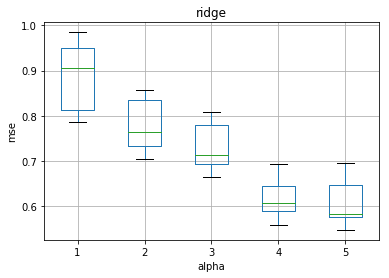

In [29]:
result_filtered3_ridge.boxplot()
plt.title("ridge")
plt.ylabel("mse")
plt.xlabel("alpha")

Text(0.5, 0, 'alpha')

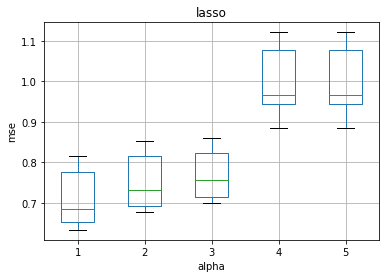

In [30]:
# Lasso Regression

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
mse = make_scorer(mean_squared_error)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
grid = GridSearchCV(estimator = Lasso(), param_grid = {'alpha':[0.01,0.05,0.1,1.0,5.0]}, scoring =mse, cv = 10, return_train_score=True).fit(X_train_preprocessed3, y_train)
result = pd.DataFrame(grid.cv_results_)
result.head(10)


result_filtered2 = result[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered3_lasso = np.transpose(result_filtered2)
result_filtered3_lasso.columns = ['1','2','3','4','5']


result_filtered3_lasso.boxplot()
plt.title("lasso")
plt.ylabel("mse")
plt.xlabel("alpha")

In [31]:
# Gardient Boosting Regression

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
mse = make_scorer(mean_squared_error)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
grid = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = {'learning_rate':[0.2],'n_estimators':[100],'subsample':[1.0]}, scoring =mse, cv = 10, return_train_score=True).fit(X_train_preprocessed3, y_train)
result = pd.DataFrame(grid.cv_results_)
result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,66.518269,3.232079,0.008272,0.001004,0.2,100,1,"{'learning_rate': 0.2, 'n_estimators': 100, 's...",0.411903,0.438369,...,0.33891,0.34181,0.341144,0.33878,0.336653,0.337889,0.339837,0.33837,0.339443,0.001669


In [33]:
result_filtered2 = result[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split5_test_score","split6_test_score","split7_test_score","split8_test_score","split9_test_score"]]
result_filtered3_gb = np.transpose(result_filtered2)
result_filtered3_gb.columns = ['1']
# result_filtered3_gb.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

In [34]:
result_filtered3_gb

,1
split0_test_score,0.411903
split1_test_score,0.438369
split2_test_score,0.449746
split3_test_score,0.428680
split4_test_score,0.444952
split5_test_score,0.447036
split6_test_score,0.499885
split7_test_score,0.505584
split8_test_score,0.459350
split9_test_score,0.481128


Text(0.5, 0, 'alpha')

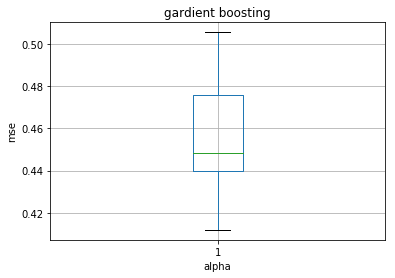

In [36]:
result_filtered3_gb.boxplot()
plt.title("gardient boosting")
plt.ylabel("mse")
plt.xlabel("alpha")

In [39]:
# Third Visualization
# Comapring the 10CV performance of three regressor's optimal hyperparameters

# Ridge: param_alpha = 5.0
# Lasso: param_alpha = 0.01
# Gardient Boosting: param_learning_rate = 0.2  param_n_estimators = 100  param_subsample = 1

ridgecv = result_filtered3_ridge['5']
lassocv = result_filtered3_lasso['1']
gbcv = result_filtered3_gb['1']

vis3 = pd.concat([ridgecv, lassocv,gbcv], axis=1, join='inner')
vis3.columns = ['ridge','lasso','gb']
vis3

,ridge,lasso,gb
split0_test_score,0.574048,0.651435,0.411903
split1_test_score,0.577808,0.689355,0.438369
split2_test_score,0.547283,0.678977,0.449746
split3_test_score,0.587035,0.635946,0.428680
split4_test_score,0.578150,0.662389,0.444952
split5_test_score,0.560286,0.633740,0.447036
split6_test_score,0.675874,0.800388,0.499885
split7_test_score,0.694660,0.815620,0.505584
split8_test_score,0.614010,0.730137,0.459350
split9_test_score,0.657554,0.790939,0.481128


Text(0.5, 0, 'regressor')

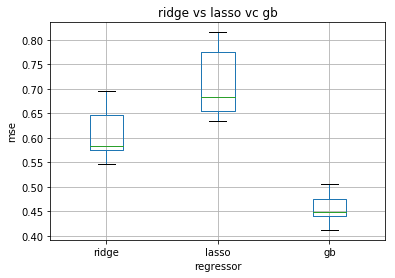

In [41]:
vis3.boxplot()
plt.title("ridge vs lasso vc gb")
plt.ylabel("mse")
plt.xlabel("regressor")

In the third visualization,...

## 4 Test with best result

In [76]:
# Best model: gradient boosting regressiong with learning rate = 0.2, n_estimators = 100, subsample = 1

best = GradientBoostingRegressor(learning_rate = 0.2,n_estimators = 100,subsample = 1)
best.fit( X_test_preprocessed3, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [77]:
feat_importance = pd.Series(best.feature_importances_, index = X_test_preprocessed2.columns)
top_10 = feat_importance.nlargest(10)

In [78]:
top_10

price                            0.467348
1                                0.069540
2                                0.049653
7                                0.047167
9                                0.045126
4                                0.033433
5                                0.021946
taster_name_Michael Schachner    0.021843
6                                0.016758
0                                0.016242
dtype: float64

<BarContainer object of 10 artists>

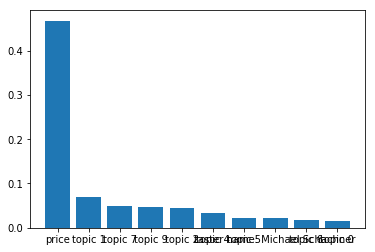

In [79]:
top_10_index = ["price","topic 1","topic 7","topic 9","topic 2","topic 4","topic 5","taster name: Michael Schachner","topic 6","topic 0"]
plt.bar(top_10_index,top_10.values)

In the fourth visualization,...